In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [3]:
train = pd.read_csv("/content/train.csv")
train.head(3)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760


In [29]:
#test.info()

In [4]:
test= pd.read_csv("/content/test (1).csv")
test.head(3)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [6]:
train.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


Exploring Missigness

Text(0.5, 1.0, 'Missing Values Heatmap')

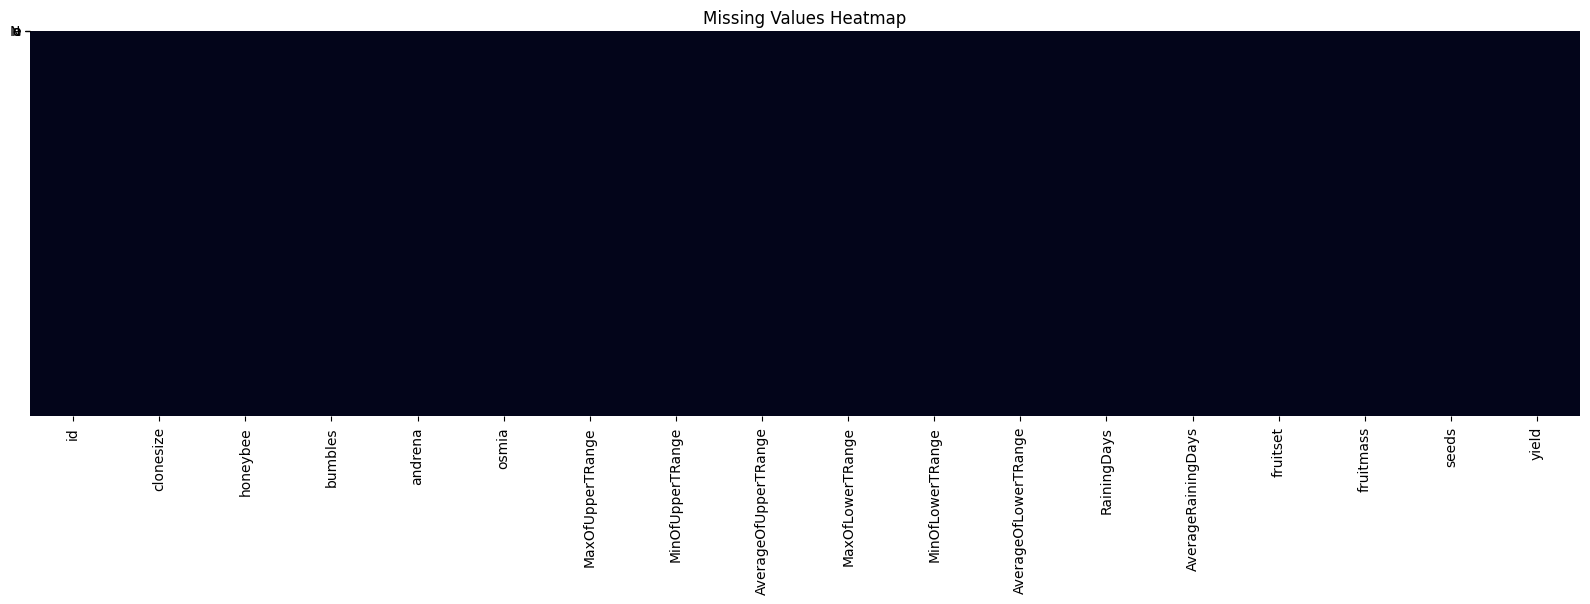

In [7]:
plt.figure(figsize=(20,5))

sns.heatmap(train.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

#Insights
Based on the heatmap above data does not have any missing data. Also, i have observed that with this data i dont need to encode it, all the data is numerical.

###Explore the distribution of the data

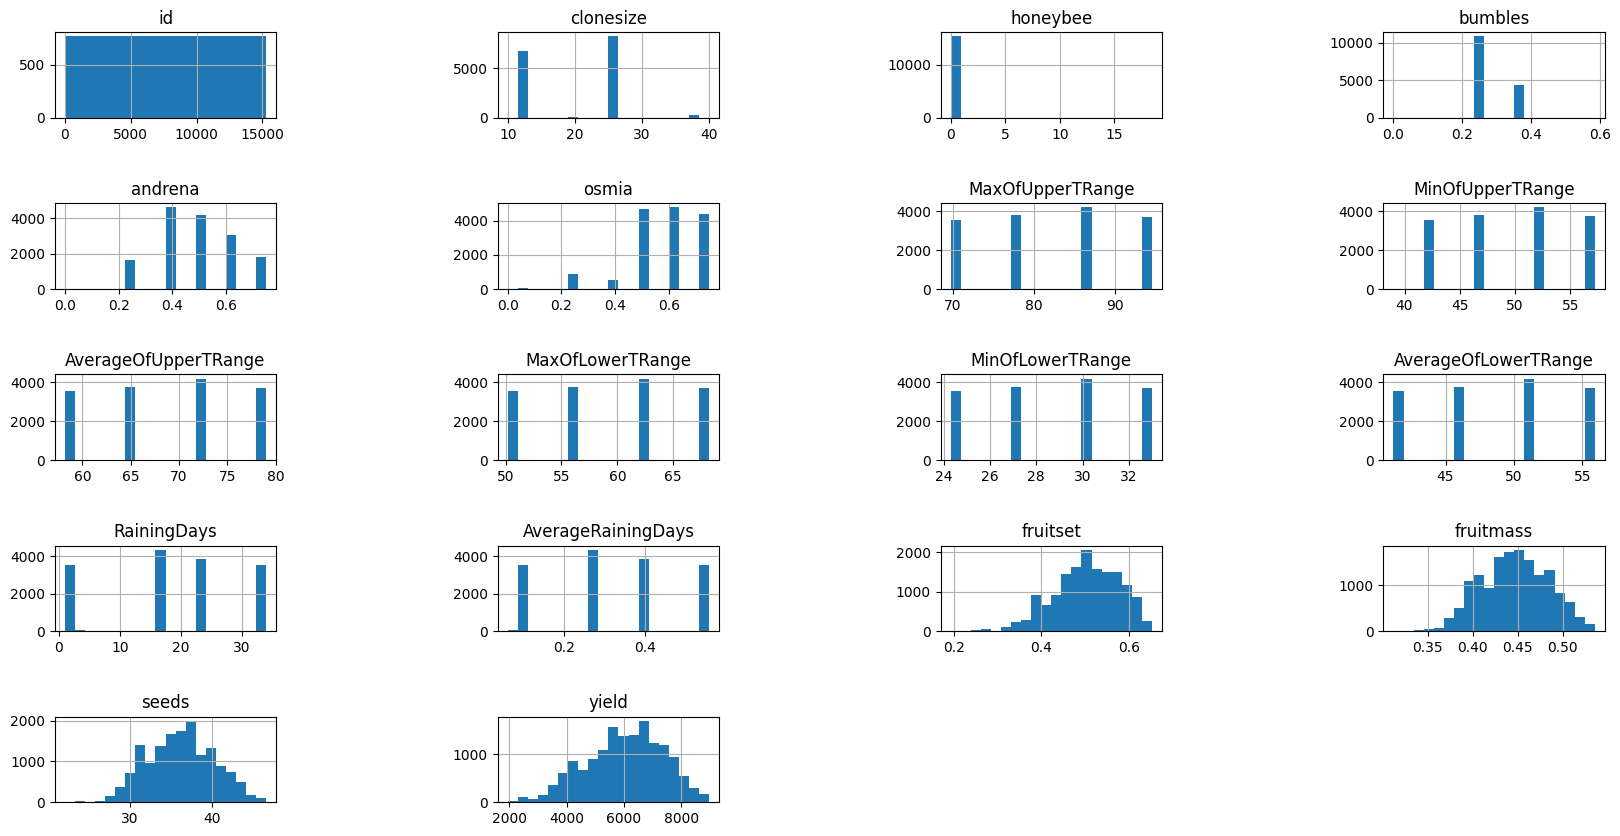

In [8]:
train.hist(figsize=(20,10),bins=20)
plt.subplots_adjust(hspace=1.0,wspace=1.0)

###Exploring outliers

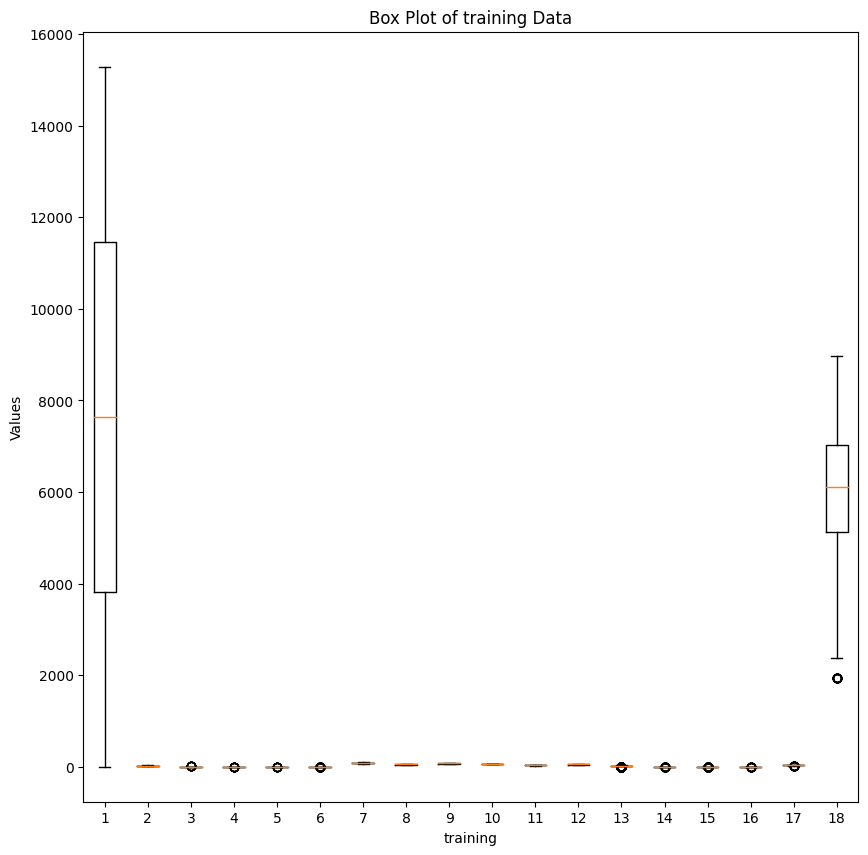

In [9]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(train)
plt.title('Box Plot of training Data')
plt.xlabel('training')
plt.ylabel('Values')
plt.show()

No outliers deected.

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train)
scaled_train = pd.DataFrame(scaled_data,
                         columns=train.columns)
scaled_train.head(3)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,-1.731938,0.802929,0.306073,-0.613664,1.737386,-0.662120,-1.363365,-1.365484,-1.368341,-1.365954,-1.364693,-1.366975,0.458012,0.401611,-1.044938,-0.783260,-0.918905,-1.158091
1,-1.731711,0.802929,0.306073,-0.613664,0.049454,-0.662120,-1.363365,-1.365484,-1.368341,-1.365954,-1.364693,-1.366975,0.458012,0.401611,-0.777454,-0.661588,-0.572230,-0.356819
2,-1.731484,-1.092448,-0.385238,-0.613664,0.927179,0.269883,0.418756,0.419514,0.424487,0.419105,0.419198,0.413979,0.458012,0.401611,0.674659,0.656157,0.540029,0.631694


In [11]:
scaler = StandardScaler()
scaled_data2=scaler.fit_transform(test)
scaled_test=pd.DataFrame(scaled_data2,columns=test.columns)

scaled_test.head(2)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,-1.731881,0.789503,-0.363088,-0.606503,-1.628845,-2.453506,0.414398,0.414768,0.420044,0.414636,0.414374,0.409109,0.466288,0.408256,-1.371318,-1.032509,-1.179639
1,-1.731541,-1.106867,-0.363088,-0.606503,1.745905,0.262907,1.353982,1.351365,1.348482,1.351655,1.352424,1.354337,-1.486257,-1.345772,-0.184207,-0.093898,0.176782


##Model Selection

In [12]:
X = scaled_train.drop(columns='yield', axis=1)
y = scaled_train['yield']

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=20)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(10702, 17) (4587, 17) (10702,) (4587,)


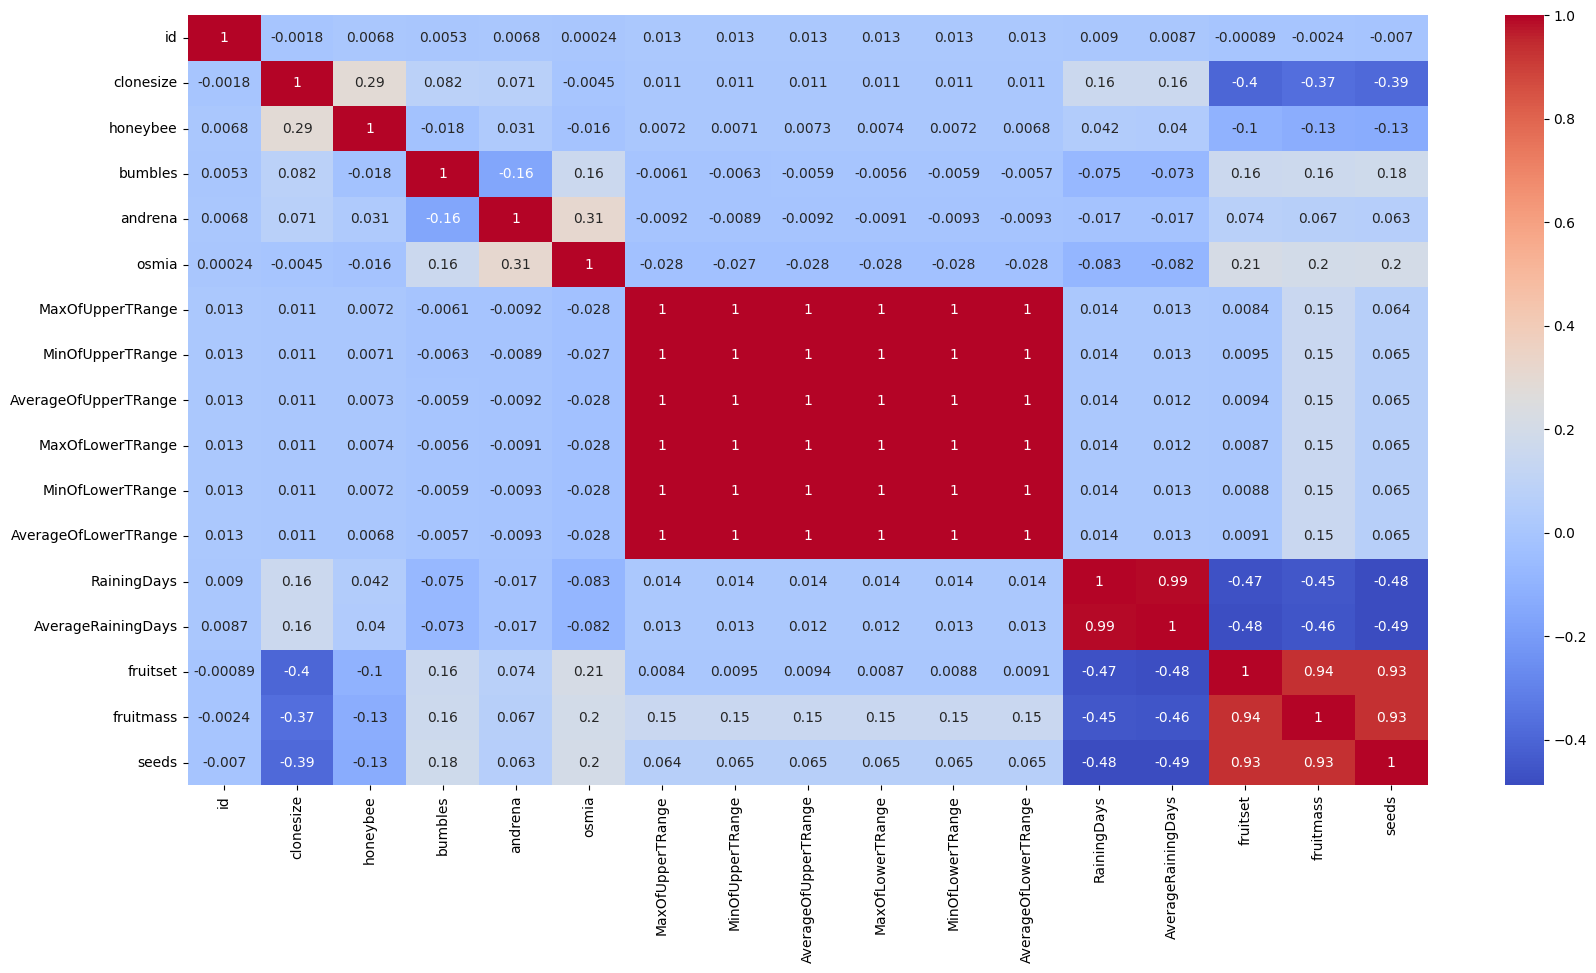

In [14]:
fig = plt.figure(figsize=(20,10))
corr_mat = X_train.corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.show()

In [15]:
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [25]:
linear_model.intercept_

-0.003210338954884723

In [16]:
# Predict on the validation set
y_val_pred = linear_model.predict(X_val)

#metrics
validation_mae = mean_absolute_error(y_val, y_val_pred)
validation_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Absolute Error: {validation_mae}')
print(f'Validation R² Score: {validation_r2}')


Validation Mean Absolute Error: 0.27513578804044997
Validation R² Score: 0.8115156928765038


In [18]:
 #Initialize and train the model
gboost_model = GradientBoostingRegressor(random_state=42)
gboost_model.fit(X_train, y_train)

y_val_pred = gboost_model.predict(X_val)
validation_mae = mean_absolute_error(y_val, y_val_pred)
validation_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Absolute Error: {validation_mae}')
print(f'Validation R² Score: {validation_r2}')



Validation Mean Absolute Error: 0.2625818017660563
Validation R² Score: 0.8208344331638429


In [23]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and test the accuracy of the model
y_val_pred = tree_model.predict(X_val)
validation_mae = mean_absolute_error(y_val, y_val_pred)
validation_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Absolute Error: {validation_mae}')
print(f'Validation R² Score: {validation_r2}')

Validation Mean Absolute Error: 0.39411385396379134
Validation R² Score: 0.6245053208656746
